<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/09_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미분
* $y=f(x)$에서 한 순간의 변화량을 구하는 것
  - $x$가 아주아주 조금 변화가 되었을 때 $y$는 얼마만큼 변화했는가
* 변화량 = $\frac{y의변화량}{x의변화량}$
---
$x$가 아주아주 조금($h$만큼) 변화 되었을 때
$$
\frac{df(x)}{dx} = \lim_{h\to 0} \frac{f(x+h) - f(x)}{ (x+h)-x }=\lim_{h\to 0} \frac{f(x+h) - f(x)}{ h }
$$


In [ ]:
# 미분 구현
import numpy as np

# 미분의 나쁜 구현
def numerical_diff(f, x):
  '''
    f : 미분 대상 함수 ( 변화량을 구할 함수 )
    x : x인 순간의 변화량을 구하기 위함
  '''
  # 분모를 0으로 두는 것은 불가능
  # x인 순간을 구해서 h를 0으로 설정하는 것이 아닌, 0에 아주아주 가까운 숫자로 지정
  #  1. 수학적으로 분모는 0이 올 수가 없다.
  #  2. 의미적으로도 변화량을 구하는 것이기 때문에 0에 무한히 가깝게 가는 것이지, 0이 아님

  h = 1e-50 # 소숫점 밑으로 0이 49개
  return (f(x+h) - f(x)) / h

너무나 작은 숫자로 나눗셈을 하게 되면, 컴퓨팅 시스템상 부동소숫점 오류가 발생한다. (반올림오차)

In [ ]:
np.float32(1e-50)

0.0

In [ ]:
1 / np.float32(1e-50) # 1 / 0.0 -> inf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

# 전방차분과 중앙차분을 이용한 미분
$$
\frac{ df(x) }{ dx }  =  \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ x+h - (x-h) } = \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ 2h }
$$

In [ ]:
# 향상된 미분 함수
def numerical_diff(f, x):
  h = 1e-4 # 0.0001이 가장 적당하다고 알려져 있습니다.
  return (f(x+h) - f(x-h)) / (2*h)

실세 $x$값을 집어 넣고 미분을 계산하는 것을 **수치미분**이라고 한다.

# 수치미분의 예시
$$
f(x)=y = 0.01x^2 + 0.1x
$$

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

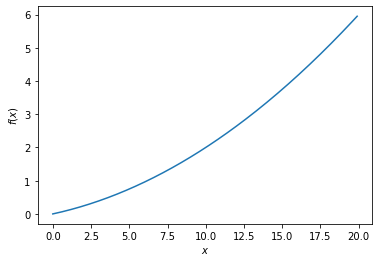

In [ ]:
x = np.arange(0.0, 20, 0.1)
y = function_1(x)

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.plot(x, y)
plt.show()

In [ ]:
print("x가 5일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 5)))
print("x가 10일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 10)))

x가 5일 때의 미분값 : 0.2
x가 10일 때의 미분값 : 0.3


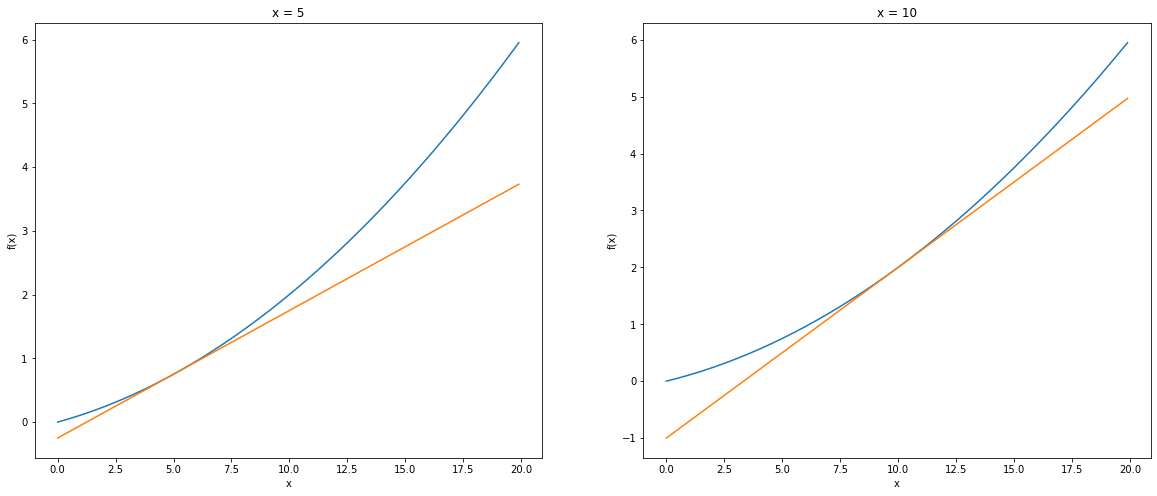

In [ ]:
# 미분값을 이용한 접선 시각화
def tangent_line(f, x):
    d = numerical_diff(f, x) # 미분을 통해 기울기를 구한다.
    y = f(x) - d*x # 기울기를 활용해서 y값을 구한다.
    return lambda t: d*t + y # y값을 토대로 접선을 그린다.

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()